In [1]:
import fedhex as fx
from fedhex.pretrain import generation as fxgen
from fedhex.posttrain import plot as fxp
from matplotlib import pyplot as plt
import numpy as np

2024-01-08 01:40:47.117789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# List data generation parameters
ndim = 2
sigma = 0.025
ngausx = 5
ngausy = 5
lims = ((0., 1.), (0., 1.))
seed = 0xace1ace1ace1ace1

# Specify generation 'Strategy' for this (gaussian) Generator
# Strategies for gaussian Generators specify the behavior of
# a base covariance matrix that changes over the sample space
strat = fxgen.RepeatStrategy(fxgen.DiagCov(ndim=ndim, sigma=sigma))

# Make a data generator instance for the specified gaussians
ggg = fx.GridGaussGenerator(cov_strat=strat, ngausx=ngausx,
                               ngausy=ngausy, seed=seed, lims=lims)

In [3]:
nsamp = 1000
samples, labels = ggg.generate(nsamp=nsamp)
data, cond = ggg.preproc()

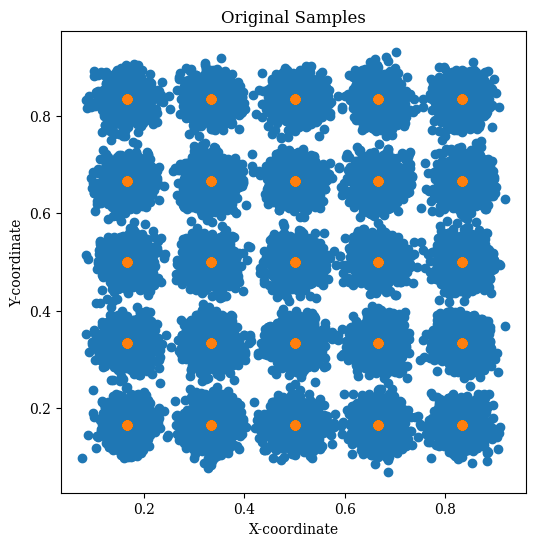

In [5]:
fig, ax1 = plt.subplots(1,1, figsize=(6,6))
ax1: plt.Axes

ax1.scatter(samples[:,0], samples[:,1])
ax1.scatter(labels[:,0], labels[:,1])
ax1.set_title("Original Samples")
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("Y-coordinate")
pass

In [6]:
nmade = 10
ninputs = 2
ncinputs = 2
hidden_layers = 2
hidden_units = 128
lr_tuple = (1e-3, 1e-4, 100)
mm = fx.MADEManager(nmade=nmade, ninputs=ninputs, ncinputs=ncinputs,
                    hidden_layers=hidden_layers, hidden_units=hidden_units,
                    lr_tuple=lr_tuple)

mm.compile_model()

In [7]:
starting_epoch = 0
end_epoch = 200
batch_size = 1024
flow_path = "./model/01-08_save/"
loss_path = flow_path + "loss.npy"

In [8]:
from fedhex.train import Checkpointer, EpochLossHistory, SelectiveProgbarLogger

callbacks = []

save_freq = 50 * batch_size
callbacks.append(Checkpointer(filepath=flow_path, save_freq=save_freq))

callbacks.append(EpochLossHistory(loss_path=loss_path))

log_freq = 10
callbacks.append(SelectiveProgbarLogger(1, epoch_interval=log_freq, epoch_end=end_epoch))

In [9]:
mm.train_model(data=data, cond=cond, batch_size=batch_size,
               starting_epoch=starting_epoch, end_epoch=end_epoch,
               path=flow_path, callbacks=callbacks)

01:41:08.83 <I> [Training begins]
epoch begin: 2024-01-08 01:41:34.377742 | time elapsed: 0:00:25.428489
Epoch 10/200
25/25 [==============================] - 1s 47ms/sample - loss: -1.6312
epoch begin: 2024-01-08 01:41:45.849075 | time elapsed: 0:00:36.899822
Epoch 20/200
25/25 [==============================] - 1s 46ms/sample - loss: -1.6570
epoch begin: 2024-01-08 01:41:57.274110 | time elapsed: 0:00:48.324857
Epoch 30/200
25/25 [==============================] - 1s 48ms/sample - loss: -1.6555
epoch begin: 2024-01-08 01:42:08.837737 | time elapsed: 0:00:59.888484
Epoch 40/200
25/25 [==============================] - 1s 48ms/sample - loss: -1.6610
epoch begin: 2024-01-08 01:42:20.460186 | time elapsed: 0:01:11.510933
Epoch 50/200
25/25 [==============================] - 2s 60ms/sample - loss: -1.6586
epoch begin: 2024-01-08 01:42:33.648878 | time elapsed: 0:01:24.699625
Epoch 60/200
25/25 [==============================] - 1s 55ms/sample - loss: -1.6642
epoch begin: 2024-01-08 01:42:

INFO:tensorflow:Assets written to: ./model/01-08_save/assets


INFO:tensorflow:Assets written to: ./model/01-08_save/assets


01:46:08.10 <I> [Training ends]
0:04:59.26 <I> [Time elapsed]


In [10]:
ngen = 500
gen_labels_unique = [0.5, 0.5]
gen_labels = np.repeat([gen_labels_unique], ngen, axis=0)
gen_cond = ggg.norm(gen_labels, is_cond=True)

gen_data = mm.eval_model(gen_cond)

gen_samples = ggg.denorm(gen_data, is_cond=False)

Text(0, 0.5, 'X-coordinate')

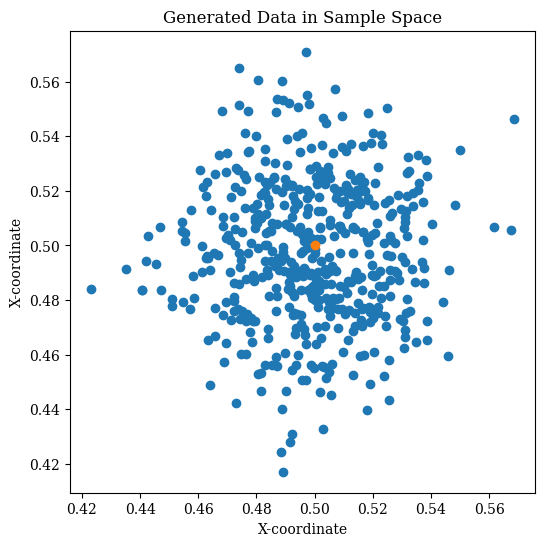

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(6,6))
ax1: plt.Axes

ax1.scatter(gen_samples[:,0], gen_samples[:,1])
ax1.scatter(gen_labels_unique[0], gen_labels_unique[1])
ax1.set_title("Generated Data in Sample Space")
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("X-coordinate")

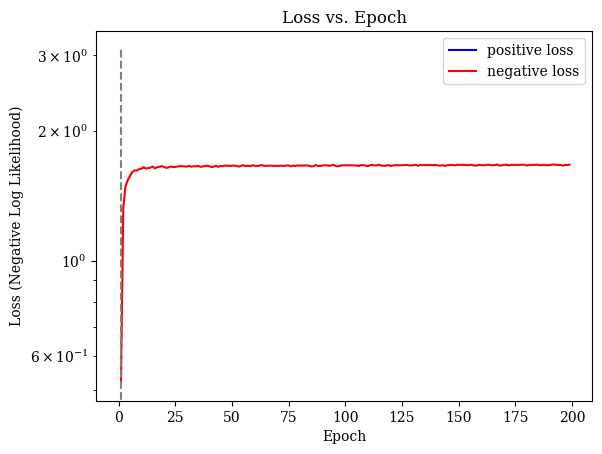

In [12]:
fxp.plot_losses(np.load(loss_path), show=True)

In [14]:
model_path = "save_test"
mm.export_model(model_path)

INFO:tensorflow:Assets written to: save_test/assets


INFO:tensorflow:Assets written to: save_test/assets


True

Text(0, 0.5, 'X-coordinate')

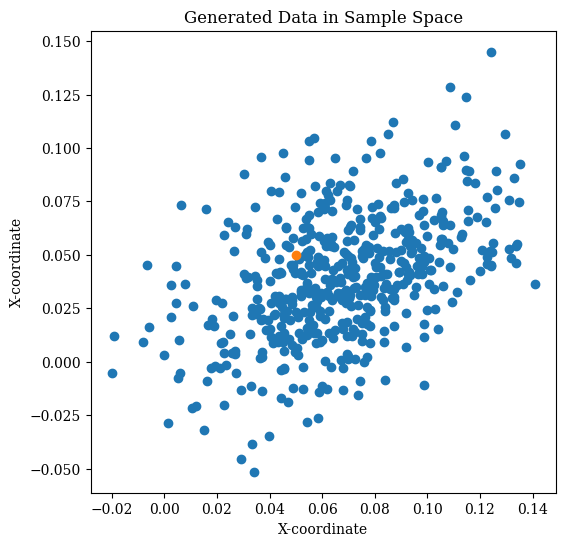

In [13]:
ngen = 500
gen_labels_unique = [0.05, 0.05]
gen_labels = np.repeat([gen_labels_unique], ngen, axis=0)
gen_cond = ggg.norm(gen_labels, is_cond=True)
gen_data = mm.eval_model(gen_cond)
gen_samples = ggg.denorm(gen_data, is_cond=False)

fig, ax1 = plt.subplots(1,1, figsize=(6,6))
ax1: plt.Axes

ax1.scatter(gen_samples[:,0], gen_samples[:,1])
ax1.scatter(gen_labels_unique[0], gen_labels_unique[1])
ax1.set_title("Generated Data in Sample Space")
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("X-coordinate")